In [1]:
# -*- coding: utf-8 -*-
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Functions for experiment

In [3]:
def get_demand(demand, d=0):
    "returns weekly demand for super apples"
    
    # Sample from uniform distribution
    rng = np.random.default_rng()
    u = rng.uniform()
    
    for i in range(1, len(demand)+1):
        if (demand[0:i].sum() < u) and (demand[0:i+1].sum() >= u):
            d = i
            
    return d

In [4]:
def stock_penalty(stock, stock_fine=20):
    "returns updated stock and stock penalty"
    if stock < 0:
        stock = 0
        stock_pen = stock_fine
    else:
        stock_pen = 0
        
    return stock, stock_pen

In [5]:
def warehouse_penalty(stock, week, max_weeks, warehouse_fine=5):
    "returns warehouse penalty"
    if week >= max_weeks-1: # doesnt charge for storage on final week
        warehouse_pen = 0 
    else:
        if stock > 0:
            warehouse_pen = warehouse_fine
        else:
            warehouse_pen = 0
        
    return warehouse_pen

In [6]:
def return_penalty(stock, week, max_weeks, return_fine=10):
    "returns return penalty"
    if week >= max_weeks-1:
        return_pen = stock*return_fine
    else:
        return_pen = 0
        
    return return_pen

In [7]:
def simulation(y, r, demand_dist, max_weeks=52):  
    
    # Initialising running totals
    weekly_demand = np.zeros(max_weeks, dtype=int)
    weekly_stock = np.zeros(max_weeks, dtype=int)
    weekly_stock_pen = np.zeros(max_weeks, dtype=int)
    weekly_warehouse_pen = np.zeros(max_weeks, dtype=int)
    weekly_return_pen = np.zeros(max_weeks, dtype=int)
    
    # Initialise tracking variables
    week = 0
    stock = 0
    
    # update stock according to policy before opening week
    if stock <= r:
        stock += y
    
    for i in range(max_weeks):
        
        # system dynamics
        demand = get_demand(demand_dist)
        stock = stock - demand
    
        # calculate penalties
        stock, stock_pen = stock_penalty(stock)
        warehouse_pen = warehouse_penalty(stock, week, max_weeks)
        return_pen = return_penalty(stock, week, max_weeks)
    
        # update running totals
        weekly_demand[i] = demand
        weekly_stock[i] = stock
        weekly_stock_pen[i] = stock_pen
        weekly_warehouse_pen[i] = warehouse_pen
        weekly_return_pen[i] = return_pen
        
        # update stock according to policy (start of week stock)
        if stock <= r:
            stock += y
        
        # increment week
        week += 1
        
    # total cost
    total_cost = weekly_stock_pen.sum() + weekly_warehouse_pen.sum() + weekly_return_pen.sum()
    
    
    return np.asarray([weekly_demand, weekly_stock, weekly_stock_pen, weekly_warehouse_pen,
                       weekly_return_pen]), total_cost

In [8]:
# Task 2

In [9]:
# define policy
y = 4 # stock update
r = 4 # stock threshold

# Demand probability distribution
demand_dist = np.asarray([0.04, 0.09, 0.27, 0.40, 0.16, 0.02, 0.02])

In [10]:
# running simulations of above policy
no_sims_t2 = 500
sim_cost_t2 = np.zeros(no_sims_t2)
sim_results_t2 = np.zeros((no_sims_t2, 5, 52))
for i in range(no_sims_t2):
    sim_results_t2[i], sim_cost_t2[i] = simulation(y, r, demand_dist)

In [11]:
# computing statistics of total cost distribution
mean_t2 = sim_cost_t2.mean()
var_t2 = sim_cost_t2.var()
std_t2 = sim_cost_t2.std()
print(mean_t2)
print(var_t2)
print(std_t2)
print(sim_cost_t2.min())
print(sim_cost_t2.max())

294.9
354.39
18.82524900233726
250.0
365.0


(array([ 20.,  40.,  61., 153., 114.,  58.,  41.,   7.,   4.,   2.]),
 array([250. , 261.5, 273. , 284.5, 296. , 307.5, 319. , 330.5, 342. ,
        353.5, 365. ]),
 <a list of 10 Patch objects>)

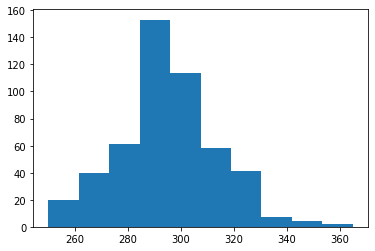

In [12]:
# Plotting Histogram
plt.figure(figsize=(6,4))
plt.hist(sim_cost_t2, bins=10, range=(sim_cost_t2.min(), sim_cost_t2.max()))
#plt.savefig('Task2.jpg')
#plt.show()

In [13]:
# Task 3

In [36]:
# running simulations for a range of policies
mean_cost_t3 = []
std_cost_t3 = []
no_sims_t3 = 500

# iterating through policies
for r in range(1, 7):
    for y in range(1, 7):
        
        # computing total cost for each week under a single policy
        sim_cost_t3 = np.zeros(no_sims_t3)
        sim_results_t3 = np.zeros((no_sims_t3, 5, 52))
        for i in range(no_sims_t3):
            sim_results_t3[i], sim_cost_t3[i] = simulation(y, r, demand_dist)
            
        # computing statistics of total cost distribution
        mean_t3 = sim_cost_t3.mean()
        std_t3 = sim_cost_t3.std()
        mean_cost_t3.append([mean_t3, r, y])
        std_cost_t3.append([std_t3, r, y])


mean_cost_t3 = np.asarray(mean_cost_t3) # array contains mean cost and associated r and y values
std_cost_t3 = np.asarray(std_cost_t3) # array contains variance of cost and associated r and y values

In [37]:
# running simulations of optimal policy
no_sims_t4 = 500
sim_cost_t4 = np.zeros(no_sims_t4)
sim_results_t4 = np.zeros((no_sims_t4, 5, 52))
for i in range(no_sims_t4):
    sim_results_t4[i], sim_cost_t4[i] = simulation(4, 3, demand_dist)

In [38]:
# computing statistics of total cost distribution
mean_t4 = sim_cost_t4.mean()
var_t4 = sim_cost_t4.var()
std_t4 = sim_cost_t4.std()
print(mean_t4)
print(var_t4)
print(std_t4)
print(sim_cost_t4.min())
print(sim_cost_t4.max())

281.18
472.95759999999996
21.74758837204714
215.0
350.0


(array([  6.,  28., 105., 126., 267., 236., 116.,  86.,  22.,   8.]),
 array([215. , 228.5, 242. , 255.5, 269. , 282.5, 296. , 309.5, 323. ,
        336.5, 350. ]),
 <a list of 10 Patch objects>)

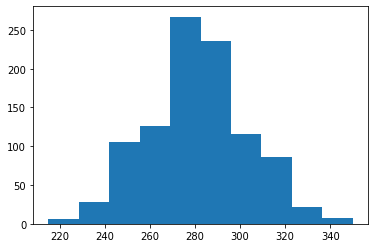

In [39]:
# Plotting Histogram
plt.figure(figsize=(6,4))
plt.hist(sim_cost_t4, bins=10, range=(sim_cost_t4.min(), sim_cost_t4.max()))
#plt.savefig('Task4.jpg')
#plt.show()

In [40]:
# finding optimal parameters
print(mean_cost_t3[:,0].min())
print(mean_cost_t3[:,0].argmin())
print(mean_cost_t3[mean_cost_t3[:,0].argmin()])
print(std_cost_t3[mean_cost_t3[:,0].argmin()])

282.465
15
[282.465   3.      4.   ]
[21.94308034  3.          4.        ]


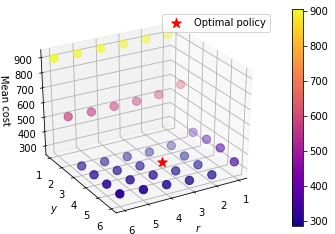

In [41]:
# filtering optimal value for plot
opt_arg = mean_cost_t3[:,0].argmin()
opt = mean_cost_t3[opt_arg]
mean_opt_rem = np.delete(mean_cost_t3, opt_arg, 0)

# scatter plot of mean cost for optimal policies
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(azim=60)
ax.set_xlabel('$r$')
ax.set_ylabel('$y$')
ax.set_zlabel('Mean cost')
p = ax.scatter(mean_opt_rem[:,1], mean_opt_rem[:,2], mean_opt_rem[:,0], c=mean_opt_rem[:,0], cmap=plt.cm.plasma, s=70)
ax.scatter(opt[1], opt[2], opt[0], marker='*', color='red', s=100, 
           label='Optimal policy')

fig.colorbar(p, ax=ax)
plt.legend()
#plt.savefig('Task3.jpg')
#plt.show()

In [42]:
# looking at the variance of optimal policy
opt_std = std_cost_t3[opt_arg] # std of optimal policy
print(opt_std)
print(std_cost_t3[:,0].min()) # minimum variance out of all policies
print(std_cost_t3[:,0].max()) # maximum variance out of all policies

[21.94308034  3.          4.        ]
16.63144536713511
86.18148525060357


In [43]:
# Task 4- # how confident are you about your conclusion in task 3?

In [44]:
print("minimum cost", opt,"\n") 

# 99% CI of TC*(y=3,r=4)
alpha = .99
z = 3
LB = opt[0] - z*opt_std[0]/(no_sims_t3**0.5)
UB = opt[0] + z*opt_std[0]/(no_sims_t3**0.5)
print("Lower bound of 99% CI of min cost", LB)
print("Upper bound of 99% CI of min cost", UB, "\n")

# 95% CI of TC*(y=3,r=4)
alpha = .95
z = 2
LB = opt[0] - z*opt_std[0]/(no_sims_t3**0.5)
UB = opt[0] + z*opt_std[0]/(no_sims_t3**0.5)
print("Lower bound of 95% CI of min cost", LB)
print("Upper bound of 95% CI of min cost", UB)

minimum cost [282.465   3.      4.   ] 

Lower bound of 99% CI of min cost 280.3832966169504
Upper bound of 99% CI of min cost 284.54670338304953 

Lower bound of 95% CI of min cost 281.0771977446336
Upper bound of 95% CI of min cost 283.8528022553663


In [46]:
# putting mean_cost_t3 into descending order
mean_cost_t3_sorted = mean_cost_t3[np.lexsort(np.fliplr(mean_cost_t3).T)]

In [24]:
# checking second best system for overlap
print("minimum cost", mean_cost_t3_sorted[1],"\n")

# 99% CI of TC*(y=3,r=4)
alpha = .99
z = 3
LB = mean_cost_t3_sorted[1,0] - z*std_cost_t3[20,0]/(no_sims_t3**0.5)
UB = mean_cost_t3_sorted[1,0] + z*std_cost_t3[20,0]/(no_sims_t3**0.5)
print("Lower bound of 99% CI of min cost", LB)
print("Upper bound of 99% CI of min cost", UB, "\n")

# 95% CI of TC*(y=3,r=4)
alpha = .95
z = 2
LB = mean_cost_t3_sorted[1,0] - z*std_cost_t3[20,0]/(no_sims_t3**0.5)
UB = mean_cost_t3_sorted[1,0] + z*std_cost_t3[20,0]/(no_sims_t3**0.5)
print("Lower bound of 95% CI of min cost", LB)
print("Upper bound of 95% CI of min cost", UB)

minimum cost [283.3   3.    4. ] 

Lower bound of 99% CI of min cost 279.25777657717936
Upper bound of 99% CI of min cost 287.34222342282067 

Lower bound of 95% CI of min cost 280.60518438478624
Upper bound of 95% CI of min cost 285.9948156152138


In [25]:
# checking third best system for overlap
print("minimum cost", mean_cost_t3_sorted[2],"\n")

# 99% CI of TC*(y=3,r=4)
alpha = .99
z = 3
LB = mean_cost_t3_sorted[2,0] - z*std_cost_t3[15,0]/(no_sims_t3**0.5)
UB = mean_cost_t3_sorted[2,0] + z*std_cost_t3[15,0]/(no_sims_t3**0.5)
print("Lower bound of 99% CI of min cost", LB)
print("Upper bound of 99% CI of min cost", UB, "\n")

# 95% CI of TC*(y=3,r=4)
alpha = .95
z = 2
LB = mean_cost_t3_sorted[2,0] - z*std_cost_t3[15,0]/(no_sims_t3**0.5)
UB = mean_cost_t3_sorted[2,0] + z*std_cost_t3[15,0]/(no_sims_t3**0.5)
print("Lower bound of 95% CI of min cost", LB)
print("Upper bound of 95% CI of min cost", UB)

minimum cost [286.78   3.     3.  ] 

Lower bound of 99% CI of min cost 283.9096724925542
Upper bound of 99% CI of min cost 289.65032750744575 

Lower bound of 95% CI of min cost 284.8664483283694
Upper bound of 95% CI of min cost 288.69355167163053
